# User input

In [1]:
start_year_past = 2021
stop_year_past = 2040
start_year_future = 2041
stop_year_future = 2060

# Import package

In [59]:
from scipy import stats
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import gumbel_r
from scipy.stats import gumbel_l
import os
import os.path
import math
import seaborn as sns

from Functions_Indicators import add_year_month_season
#from Functions_Indicators_precipitation import changes_in_indicators

# Import data

In [3]:
out_path = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz'
csv_path = os.path.join(out_path,'csv_file','pr','pr_mm_per_day_day_1950-2100','pr_1950-2100_projectsMoz.csv')
precipitation = pd.read_csv(csv_path,header=[0],index_col=[0,1,2,3,4])
#list_time_2021_2060=pd.date_range('01-01-2021','31-12-2060', freq='D').strftime('%d-%m-%Y').values.tolist()

In [4]:
precipitation_copy = precipitation.copy(deep=True) # make a coåy that can be modified without changin the original

In [5]:
precipitation

Date  \
Name project  Experiment Model      Latitude Longitude               
WTP_Mutua_EIB historical ACCESS-CM2 -19.375  34.625     01-01-1950   
                                             34.625     02-01-1950   
                                             34.625     03-01-1950   
                                             34.625     04-01-1950   
                                             34.625     05-01-1950   
...                                                            ...   
Pemba_EIB     ssp370     TaiESM1    -12.875  40.625     27-12-2100   
                                             40.625     28-12-2100   
                                             40.625     29-12-2100   
                                             40.625     30-12-2100   
                                             40.625     31-12-2100   

                                                        Mean of the daily precipitation rate mm_per_day  
Name project  Experiment Model      Latitude Longitude                                                   
WTP_Mutua_EIB historical ACCESS-CM2 -19.375  34.625                                            0.657509  
                                             34.625                                            0.442182  
                                             34.625                                            0.031404  
                                             34.625                                           15.071664  
                                             34.625                                           12.865736  
...                                                                                                 ...  
Pemba_EIB     ssp370     TaiESM1    -12.875  40.625                                            0.286506  
                                             40.625                                            0.050367  
                                             40.625                                            0.000000  
                                             40.625                                            0.581391  
                                             40.625                                            6.940897  

[8963100 rows x 2 columns]

In [6]:
# delete model 'NESM3' that does not have any value
try:
    precipitation_copy = precipitation_copy.copy(deep=True)
    precipitation_copy.drop('NESM3', level=2, axis=0, inplace=True)
    precipitation_copy.loc[(precipitation_copy.index.levels[0][0],precipitation_copy.index.levels[1][0],'NESM3')]
except KeyError:
    print('KeyError')

KeyError


C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_6780\3641866668.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  precipitation_copy.loc[(precipitation_copy.index.levels[0][0],precipitation_copy.index.levels[1][0],'NESM3')]


In [8]:
df_years

Date  \
Name project  Experiment Model      Latitude               
WTP_Mutua_EIB historical ACCESS-CM2 -19.375   01-01-1950   
                                    -19.375   02-01-1950   
                                    -19.375   03-01-1950   
                                    -19.375   04-01-1950   
                                    -19.375   05-01-1950   
...                                                  ...   
Pemba_EIB     ssp370     TaiESM1    -12.875   27-12-2100   
                                    -12.875   28-12-2100   
                                    -12.875   29-12-2100   
                                    -12.875   30-12-2100   
                                    -12.875   31-12-2100   

                                              Mean of the daily precipitation rate mm_per_day  
Name project  Experiment Model      Latitude                                                   
WTP_Mutua_EIB historical ACCESS-CM2 -19.375                                          0.657509  
                                    -19.375                                          0.442182  
                                    -19.375                                          0.031404  
                                    -19.375                                         15.071664  
                                    -19.375                                         12.865736  
...                                                                                       ...  
Pemba_EIB     ssp370     TaiESM1    -12.875                                          0.286506  
                                    -12.875                                          0.050367  
                                    -12.875                                          0.000000  
                                    -12.875                                          0.581391  
                                    -12.875                                          6.940897  

[8365560 rows x 2 columns]

In [41]:
# treatment of dataframe to make useable
df_years=precipitation_copy.copy(deep=True)

#df_years=df_years.rename(columns={df_years.columns[0]:'Precipitation mm/day period 2021-2060'})
df_years=df_years.droplevel(level=4) # drop latitude index
df_years=df_years.droplevel(level=3) # drop latitude index

df_years=df_years.reset_index()

df_years=add_year_month_season(df_years,'Date')
df_years

,Name project,Experiment,Model,Date,Mean of the daily precipitation rate mm_per_day,Year,Month,Season
0,WTP_Mutua_EIB,historical,ACCESS-CM2,01-01-1950,0.657509,1950,Jan,Humid
1,WTP_Mutua_EIB,historical,ACCESS-CM2,02-01-1950,0.442182,1950,Jan,Humid
2,WTP_Mutua_EIB,historical,ACCESS-CM2,03-01-1950,0.031404,1950,Jan,Humid
3,WTP_Mutua_EIB,historical,ACCESS-CM2,04-01-1950,15.071664,1950,Jan,Humid
4,WTP_Mutua_EIB,historical,ACCESS-CM2,05-01-1950,12.865736,1950,Jan,Humid
...,...,...,...,...,...,...,...,...
8365555,Pemba_EIB,ssp370,TaiESM1,27-12-2100,0.286506,2100,Dec,Humid
8365556,Pemba_EIB,ssp370,TaiESM1,28-12-2100,0.050367,2100,Dec,Humid
8365557,Pemba_EIB,ssp370,TaiESM1,29-12-2100,0.000000,2100,Dec,Humid
8365558,Pemba_EIB,ssp370,TaiESM1,30-12-2100,0.581391,2100,Dec,Humid


In [ ]:
# select past datas, between start_year_future and stop_year_future
df_past = df_years.loc[df_years['Year'].between(start_year_past,stop_year_past)]
df_past

In [ ]:
# select future data, between start_year_future and stop_year_future
df_future = df_years.loc[df_years['Year'].between(start_year_future,stop_year_future)]
df_future

In [ ]:
df_future_pr = df_years[df_years['Name project']=='PT__Dumping_Site'].groupby(['Model','Experiment','Year']).mean(numeric_only=True)

In [ ]:
df_future_pr

In [ ]:
import seaborn as sns

In [ ]:
sns.lineplot(df_future_pr.reset_index(),x='Year',y='Precipitation mm/day period 2021-2060',hue='Experiment',errorbar=('pi',80))

## Average yearly precipitation

In [13]:
from Functions_Indicators import yearly_avg
from Functions_Indicators import yearly_avg_distr

In [25]:
# For historical period
title_column = 'Yearly average precipitation mm/year period '+str(start_year_past)+'-'+str(stop_year_past)
df_yearly_avg= yearly_avg(df_years.drop(['Month','Season'],axis=1),'Mean of the daily precipitation rate mm_per_day')
#df_years_avg_distribution = yearly_avg_pr_distr(df_yearly_avg)

In [26]:
df_yearly_avg

Mean of the daily precipitation rate mm_per_day
Name project    Experiment Model                                                         
Chimoio_WTP_EIB historical ACCESS-CM2                                            5.577622
                           ACCESS-ESM1-5                                         5.872321
                           BCC-CSM2-MR                                           6.196167
                           CMCC-CM2-SR5                                          6.911096
                           CMCC-ESM2                                             6.825588
...                                                                                   ...
WTP_Mutua_EIB   ssp585     MPI-ESM1-2-LR                                         7.085058
                           MRI-ESM2-0                                            8.097407
                           NorESM2-LM                                            7.151941
                           NorESM2-MM                                            8.533685
                           TaiESM1                                               8.314427

[280 rows x 1 columns]

Text(0.5, 1.0, 'Mean precipitation mm per year, depending on scenario and\naccross models, between 1950 to 2100 at Gorongosa, MZ\ndata modeled with NEX-GDDP-CMIP6')

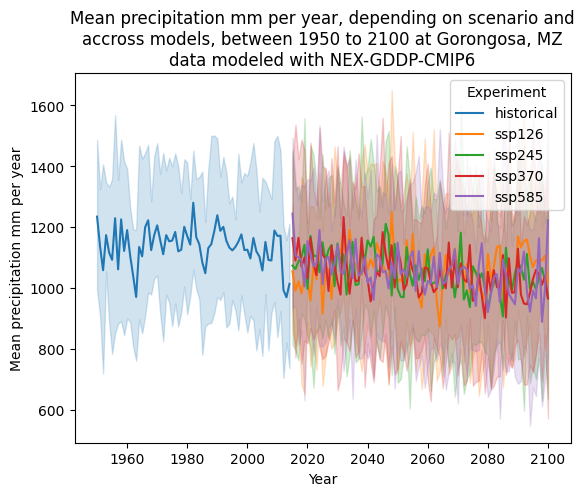

In [61]:
sns.lineplot(df_years_gorongosa_year_avg_mm_year,x='Year',y='Mean of the daily precipitation rate mm_per_year',hue='Experiment',errorbar=('pi',80))
plt.ylabel('Mean precipitation mm per year')
plt.title('Mean precipitation mm per year, depending on scenario and\naccross models, between 1950 to 2100 at Gorongosa, MZ\ndata modeled with NEX-GDDP-CMIP6')

In [42]:
df_years_gorongosa = df_years[df_years['Name project']=='Gorongosa_EIB']

In [43]:
df_years_gorongosa = df_years_gorongosa.drop('Name project',axis=1)

In [44]:
df_years_gorongosa

,Experiment,Model,Date,Mean of the daily precipitation rate mm_per_day,Year,Month,Season
2091390,historical,ACCESS-CM2,01-01-1950,3.830031,1950,Jan,Humid
2091391,historical,ACCESS-CM2,02-01-1950,2.447746,1950,Jan,Humid
2091392,historical,ACCESS-CM2,03-01-1950,1.033146,1950,Jan,Humid
2091393,historical,ACCESS-CM2,04-01-1950,12.821172,1950,Jan,Humid
2091394,historical,ACCESS-CM2,05-01-1950,19.139076,1950,Jan,Humid
...,...,...,...,...,...,...,...
4182775,ssp370,TaiESM1,27-12-2100,23.041087,2100,Dec,Humid
4182776,ssp370,TaiESM1,28-12-2100,16.827069,2100,Dec,Humid
4182777,ssp370,TaiESM1,29-12-2100,11.197097,2100,Dec,Humid
4182778,ssp370,TaiESM1,30-12-2100,20.220607,2100,Dec,Humid


In [46]:
df_years_gorongosa_year_avg=df_years_gorongosa.groupby(['Experiment','Model','Year'])[['Mean of the daily precipitation rate mm_per_day']].mean().reset_index()

In [52]:
df_years_gorongosa_year_avg_mm_year = df_years_gorongosa_year_avg.copy(deep=True)

In [53]:
df_years_gorongosa_year_avg_mm_year['Mean of the daily precipitation rate mm_per_year'] =df_years_gorongosa_year_avg['Mean of the daily precipitation rate mm_per_day']*365.25

In [57]:
df_years_gorongosa_year_avg_mm_year

,Experiment,Model,Year,Mean of the daily precipitation rate mm_per_year
0,historical,ACCESS-CM2,1950,1254.903733
1,historical,ACCESS-CM2,1951,1514.659313
2,historical,ACCESS-CM2,1952,1014.561505
3,historical,ACCESS-CM2,1953,1276.399301
4,historical,ACCESS-CM2,1954,1126.445944
...,...,...,...,...
5721,ssp585,TaiESM1,2096,1085.032532
5722,ssp585,TaiESM1,2097,1503.642256
5723,ssp585,TaiESM1,2098,1538.500376
5724,ssp585,TaiESM1,2099,421.416195


In [56]:
df_years_gorongosa_year_avg_mm_year = df_years_gorongosa_year_avg_mm_year.drop('Mean of the daily precipitation rate mm_per_day',axis=1)

In [33]:
df_years_gorongosa

,Experiment,Model,Date,Mean of the daily precipitation rate mm_per_day,Year,Month,Season
2091390,historical,ACCESS-CM2,01-01-1950,3.830031,3.830031,3.830031,3.830031
2091391,historical,ACCESS-CM2,02-01-1950,2.447746,2.447746,2.447746,2.447746
2091392,historical,ACCESS-CM2,03-01-1950,1.033146,1.033146,1.033146,1.033146
2091393,historical,ACCESS-CM2,04-01-1950,12.821172,12.821172,12.821172,12.821172
2091394,historical,ACCESS-CM2,05-01-1950,19.139076,19.139076,19.139076,19.139076
...,...,...,...,...,...,...,...
4182775,ssp370,TaiESM1,27-12-2100,23.041087,23.041087,23.041087,23.041087
4182776,ssp370,TaiESM1,28-12-2100,16.827069,16.827069,16.827069,16.827069
4182777,ssp370,TaiESM1,29-12-2100,11.197097,11.197097,11.197097,11.197097
4182778,ssp370,TaiESM1,30-12-2100,20.220607,20.220607,20.220607,20.220607


In [62]:
df_years_gorongosa_month_avg=df_years_gorongosa.groupby(['Experiment','Model','Month'])[['Mean of the daily precipitation rate mm_per_day']].mean().reset_index()
df_years_gorongosa_month_avg

,Experiment,Model,Month,Mean of the daily precipitation rate mm_per_day
0,historical,ACCESS-CM2,Apr,2.188845
1,historical,ACCESS-CM2,Aug,0.629560
2,historical,ACCESS-CM2,Dec,6.749855
3,historical,ACCESS-CM2,Feb,7.306284
4,historical,ACCESS-CM2,Jan,7.782905
...,...,...,...,...
835,ssp585,TaiESM1,Mar,6.228207
836,ssp585,TaiESM1,May,1.271790
837,ssp585,TaiESM1,Nov,2.094624
838,ssp585,TaiESM1,Oct,0.699126


In [69]:
df_years_gorongosa_month_avg_mm_month = df_years_gorongosa_month_avg.copy(deep=True)

In [70]:
df_years_gorongosa_month_avg_mm_month['Mean of the daily precipitation rate mm_per_month'] =df_years_gorongosa_month_avg_mm_month['Mean of the daily precipitation rate mm_per_day']*30

In [71]:
df_years_gorongosa_month_avg_mm_month = df_years_gorongosa_month_avg_mm_month.drop('Mean of the daily precipitation rate mm_per_day',axis=1)

In [72]:
df_years_gorongosa_month_avg_mm_month

,Experiment,Model,Month,Mean of the daily precipitation rate mm_per_month
0,historical,ACCESS-CM2,Apr,65.665340
1,historical,ACCESS-CM2,Aug,18.886792
2,historical,ACCESS-CM2,Dec,202.495648
3,historical,ACCESS-CM2,Feb,219.188506
4,historical,ACCESS-CM2,Jan,233.487143
...,...,...,...,...
835,ssp585,TaiESM1,Mar,186.846208
836,ssp585,TaiESM1,May,38.153704
837,ssp585,TaiESM1,Nov,62.838721
838,ssp585,TaiESM1,Oct,20.973783


In [74]:
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
data_boxplot=df_years_gorongosa_month_avg_mm_month.reset_index().set_index('Month').loc[month_order].reset_index()
#data_line=data_line.reset_index().set_index(temporal_resolution).loc[month_order].reset_index()   

<Axes: xlabel='Month', ylabel='Mean of the daily precipitation rate mm_per_month'>

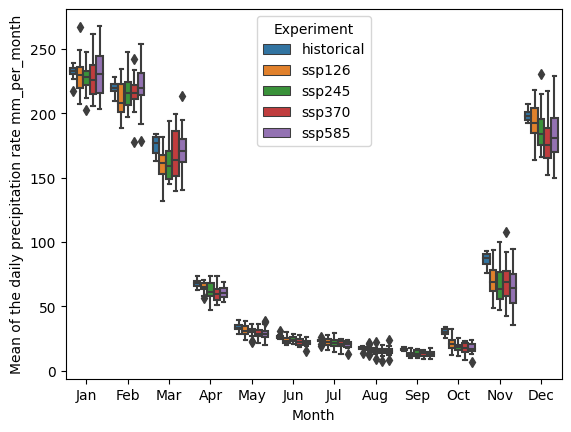

In [75]:
sns.boxplot(data=data_boxplot,x='Month',y='Mean of the daily precipitation rate mm_per_month',hue='Experiment')

In [ ]:
# For future period
title_column = 'Yearly average precipitation mm/year period '+str(start_year_future)+'-'+str(stop_year_future)

df_years_avg_future_distribution= yearly_avg_pr(df_future,title_column)

In [ ]:
sns.lineplot(tas_yearly_avg,x='Year',y='Yearly average temperature',hue='Experiment',errorbar=tuple_error_bar)

In [ ]:
# Comparaison between past and future period

In [ ]:
changes_past_future_indicator = pd.DataFrame()
changes_past_future_indicator1 = changes_in_indicators(df_years_avg_past_distribution,df_years_avg_future_distribution,'Average yearly precipitation','mm/year','Incremental rainfall change')
changes_past_future_indicator=pd.concat([changes_past_future_indicator,changes_past_future_indicator1])
changes_past_future_indicator

In [ ]:
df_past

In [ ]:
# boxplot

df_yearly_avg = df_past.copy(deep =True)
df_yearly_avg=df_yearly_avg.drop(labels='Date',axis=1)
df_yearly_avg=df_yearly_avg.rename(columns={df_yearly_avg.columns[3]:'Yearly precipitation mm/year'})
df_yearly_avg = df_yearly_avg.groupby(['Name project','Experiment','Model','Year']).sum() # sum per year
#df_yearly_avg = df_yearly_avg.groupby(['Name project','Experiment','Model']).mean()

dict_boxplot = plt.boxplot([df_yearly_avg.loc[('PT_Revubue_2_Rev_2_01','ssp126'),'Yearly precipitation mm/year'].values.reshape(len(df_yearly_avg.loc[('PT_Revubue_2_Rev_2_01','ssp126'),'Yearly precipitation mm/year']),),df_yearly_avg.loc[('PT_Revubue_2_Rev_2_01','ssp245'),'Yearly precipitation mm/year'].values.reshape(len(df_yearly_avg.loc[('PT_Revubue_2_Rev_2_01','ssp245'),'Yearly precipitation mm/year']),),df_yearly_avg.loc[('PT_Revubue_2_Rev_2_01','ssp370'),'Yearly precipitation mm/year'].values.reshape(len(df_yearly_avg.loc[('PT_Revubue_2_Rev_2_01','ssp370'),'Yearly precipitation mm/year']),),df_yearly_avg.loc[('PT_Revubue_2_Rev_2_01','ssp585'),'Yearly precipitation mm/year'].values.reshape(len(df_yearly_avg.loc[('PT_Revubue_2_Rev_2_01','ssp126'),'Yearly precipitation mm/year']),)],notch=True, whis =(10,90),widths = 0.15, patch_artist=True,labels=df_yearly_avg.index.levels[1].tolist())
# ... present boxplot over the period for each models
# this functions returns varius parameters of the boxplot in the dict_boxplot. This funcitons also returns an image of it
# here, numpy_array is a vector. But can also include array with several columns. Each columns will have a boxplot
# 'notch' is true to enhance part where the median is
# 'whis' is the percentile value for the whiskers, every data out of the range indicted by those 2 floats are represented as points
# 'widths' determine width of the boxes
# 'patch_artist' colors the boxplots
# 'labels' gives a name to every column included in the data part

#str = 'Annual maximum precipitation mm/day\naccross different scenarios between 2030 and 2060'
#title_png = 'Annual maximum precipitation mm.day accross different scenarios between 2030 and 2060.png'
#plt.title(str)
plt.xlabel('Scenarios')
plt.ylabel('Yearly precipitation mm/year for project PT_Revubue_2_Rev_2_01')
#path_boxplot = os.path.join(path_figure,'Boxplots')
#if not os.path.isdir(path_boxplot):
#    os.makedirs(path_boxplot)
#plt.savefig(os.path.join(path_boxplot,title_png),format ='png') # savefig or save text must be before plt.show. for savefig, format should be explicity written
plt.show()

In [ ]:
df_yearly_avg = df_yearly_avg.groupby(['Name project','Experiment','Model']).mean()
title_column = 'Yearly average precipitation mm/year'
df_yearly_avg=df_yearly_avg.rename(columns={df_yearly_avg.columns[0]:title_column})
df_yearly_avg

In [ ]:
dict_boxplot = plt.boxplot([df_yearly_avg.loc[(df_yearly_avg.index.levels[0][0]),title_column].values.reshape(len(df_yearly_avg.loc[(df_yearly_avg.index.levels[0][0]),title_column]),),df_yearly_avg.loc[(df_yearly_avg.index.levels[0][1]),title_column].values.reshape(len(df_yearly_avg.loc[(df_yearly_avg.index.levels[0][1]),title_column]),),df_yearly_avg.loc[(df_yearly_avg.index.levels[0][2]),title_column].values.reshape(len(df_yearly_avg.loc[(df_yearly_avg.index.levels[0][2]),title_column]),),df_yearly_avg.loc[(df_yearly_avg.index.levels[0][3]),title_column].values.reshape(len(df_yearly_avg.loc[(df_yearly_avg.index.levels[0][3]),title_column]),),df_yearly_avg.loc[(df_yearly_avg.index.levels[0][4]),title_column].values.reshape(len(df_yearly_avg.loc[(df_yearly_avg.index.levels[0][4]),title_column]),),df_yearly_avg.loc[(df_yearly_avg.index.levels[0][5]),title_column].values.reshape(len(df_yearly_avg.loc[(df_yearly_avg.index.levels[0][5]),title_column]),),df_yearly_avg.loc[(df_yearly_avg.index.levels[0][6]),title_column].values.reshape(len(df_yearly_avg.loc[(df_yearly_avg.index.levels[0][6]),title_column]),)],notch=True, whis =(10,90),widths = 0.15, patch_artist=True,labels=df_yearly_avg.index.levels[0].tolist())
# ... present boxplot over the period for each models
# this functions returns varius parameters of the boxplot in the dict_boxplot. This funcitons also returns an image of it
# here, numpy_array is a vector. But can also include array with several columns. Each columns will have a boxplot
# 'notch' is true to enhance part where the median is
# 'whis' is the percentile value for the whiskers, every data out of the range indicted by those 2 floats are represented as points
# 'widths' determine width of the boxes
# 'patch_artist' colors the boxplots
# 'labels' gives a name to every column included in the data part

#str = 'Annual maximum precipitation mm/day\naccross different scenarios between 2030 and 2060'
#title_png = 'Annual maximum precipitation mm.day accross different scenarios between 2030 and 2060.png'
#plt.title(str)
plt.xlabel('Projects')
plt.ylabel('Average yearly precipitation mm/year for project PT_Revubue_2_Rev_2_01')
#path_boxplot = os.path.join(path_figure,'Boxplots')
#if not os.path.isdir(path_boxplot):
#    os.makedirs(path_boxplot)
#plt.savefig(os.path.join(path_boxplot,title_png),format ='png') # savefig or save text must be before plt.show. for savefig, format should be explicity written
plt.show()

## Seasonal average precipitation

In [ ]:
from Functions_Indicators_precipitation import avg_dry_season_precipitation

In mozambique, dry season from April to september. Humid season from October to March

In [ ]:
# historic

In [ ]:
title_column1 = 'Yearly average precipitation mm/season per year for the period '+str(start_year_past)+'-'+str(stop_year_past)
pr_past_dry_season_mean_distribution = avg_dry_season_precipitation(df_past,title_column1)

In [ ]:
# future

In [ ]:
title_column1 = 'Yearly average precipitation mm/dry season for the period '+str(start_year_future)+'-'+str(stop_year_future)
pr_future_dry_season_mean_distribution = avg_dry_season_precipitation(df_future,title_column1)

In [ ]:
pr_future_dry_season_mean_distribution

In [ ]:
# Comparaison between past and future period

In [ ]:
changes_past_future_indicator1 = changes_in_indicators(pr_past_dry_season_mean_distribution,pr_future_dry_season_mean_distribution,'Average dry season precipitation','mm/(months of dry season)','Incremental rainfall change')
changes_past_future_indicator=pd.merge(changes_past_future_indicator, changes_past_future_indicator1, left_index=True, right_index=True, how='outer')

In [ ]:
changes_past_future_indicator

## Return period

In [81]:
 #INDICATOR NOT FINISHED
#from Functions_Indicators_precipitation import threshold_coresponding_to_return_period
from Functions_Indicators import dataframe_threshold_coresponding_to_return_period
#from Functions_Indicators_precipitation import dataframe_future_return_period_of_1_day_event

In [82]:
df_years_gorongosa

,Experiment,Model,Date,Mean of the daily precipitation rate mm_per_day,Year,Month,Season
2091390,historical,ACCESS-CM2,01-01-1950,3.830031,1950,Jan,Humid
2091391,historical,ACCESS-CM2,02-01-1950,2.447746,1950,Jan,Humid
2091392,historical,ACCESS-CM2,03-01-1950,1.033146,1950,Jan,Humid
2091393,historical,ACCESS-CM2,04-01-1950,12.821172,1950,Jan,Humid
2091394,historical,ACCESS-CM2,05-01-1950,19.139076,1950,Jan,Humid
...,...,...,...,...,...,...,...
4182775,ssp370,TaiESM1,27-12-2100,23.041087,2100,Dec,Humid
4182776,ssp370,TaiESM1,28-12-2100,16.827069,2100,Dec,Humid
4182777,ssp370,TaiESM1,29-12-2100,11.197097,2100,Dec,Humid
4182778,ssp370,TaiESM1,30-12-2100,20.220607,2100,Dec,Humid


In [271]:
def dataframe_threshold_coresponding_to_return_period(df):
    df_copy=df.copy(deep=True)
    df_copy=df_copy.drop(labels='Date',axis=1)
    df_max = df_copy.groupby(['Name project','Experiment','Model','Year']).agg(np.nanmax) # maximum    
    midx = pd.MultiIndex.from_product([list(set(df_copy[df_copy.columns[0]])),list(set(df_copy[df_copy.columns[1]])),list(set(df_copy[df_copy.columns[2]]))],names=['Name project','Experiment', 'Model'])
    cols = ['Value for return period 50 years mm/day','Value for return period 100 years mm/day']
    return_period = pd.DataFrame(data = [], 
                                index = midx,
                                columns = cols)
    for name_p in return_period.index.levels[0].tolist():
        for ssp in return_period.index.levels[1].tolist():
            for model in return_period.index.levels[2].tolist():
                print('Name project '+name_p+ ' ssp '+ssp+ ' model '+model)
                Z=df_max.loc[(name_p,ssp,model)]['Mean of the daily precipitation rate mm_per_day'].values.reshape(len(df_max.loc[(name_p,ssp,model)]['Mean of the daily precipitation rate mm_per_day']),)
                (loc1,scale)=stats.gumbel_r.fit(Z) # return the function necessary to establish the continous function
                # choice of gumbel because suits to extreme precipitation
                return_period.loc[(name_p,ssp,model),('Value for return period 50 years mm/day')] = threshold_coresponding_to_return_period(loc1,scale,50)
                return_period.loc[(name_p,ssp,model),('Value for return period 100 years mm/day')] = threshold_coresponding_to_return_period(loc1,scale,100)
                
    return return_period

In [215]:
df_years

,Name project,Experiment,Model,Date,Mean of the daily precipitation rate mm_per_day,Year,Month,Season
23741,WTP_Mutua_EIB,historical,ACCESS-ESM1-5,01-01-1950,0.000000,1950,Jan,Humid
23742,WTP_Mutua_EIB,historical,ACCESS-ESM1-5,02-01-1950,0.000000,1950,Jan,Humid
23743,WTP_Mutua_EIB,historical,ACCESS-ESM1-5,03-01-1950,1.017100,1950,Jan,Humid
23744,WTP_Mutua_EIB,historical,ACCESS-ESM1-5,04-01-1950,0.779398,1950,Jan,Humid
23745,WTP_Mutua_EIB,historical,ACCESS-ESM1-5,05-01-1950,0.349717,1950,Jan,Humid
...,...,...,...,...,...,...,...,...
8365555,Pemba_EIB,ssp370,TaiESM1,27-12-2100,0.286506,2100,Dec,Humid
8365556,Pemba_EIB,ssp370,TaiESM1,28-12-2100,0.050367,2100,Dec,Humid
8365557,Pemba_EIB,ssp370,TaiESM1,29-12-2100,0.000000,2100,Dec,Humid
8365558,Pemba_EIB,ssp370,TaiESM1,30-12-2100,0.581391,2100,Dec,Humid


In [272]:
#def dataframe_threshold_coresponding_to_return_period(df):
df_years=df_years[df_years['Model']!='IITM-ESM']
df_years=df_years[df_years['Model']!='MRI-ESM2-0']
df_years=df_years[df_years['Model']!='ACCESS-CM2'] 
df_years = df_years[df_years['Model']!='MPI-ESM1-2-HR']

In [273]:
return_period_future=dataframe_threshold_coresponding_to_return_period(df_years[df_years['Experiment']!='historical'])

Name project Chimoio_WTP_EIB ssp ssp126 model ACCESS-ESM1-5
Name project Chimoio_WTP_EIB ssp ssp126 model BCC-CSM2-MR
Name project Chimoio_WTP_EIB ssp ssp126 model CMCC-CM2-SR5
Name project Chimoio_WTP_EIB ssp ssp126 model CMCC-ESM2
Name project Chimoio_WTP_EIB ssp ssp126 model CanESM5
Name project Chimoio_WTP_EIB ssp ssp126 model MIROC6
Name project Chimoio_WTP_EIB ssp ssp126 model MPI-ESM1-2-LR
Name project Chimoio_WTP_EIB ssp ssp126 model NorESM2-LM
Name project Chimoio_WTP_EIB ssp ssp126 model NorESM2-MM
Name project Chimoio_WTP_EIB ssp ssp126 model TaiESM1
Name project Chimoio_WTP_EIB ssp ssp245 model ACCESS-ESM1-5
Name project Chimoio_WTP_EIB ssp ssp245 model BCC-CSM2-MR
Name project Chimoio_WTP_EIB ssp ssp245 model CMCC-CM2-SR5
Name project Chimoio_WTP_EIB ssp ssp245 model CMCC-ESM2
Name project Chimoio_WTP_EIB ssp ssp245 model CanESM5
Name project Chimoio_WTP_EIB ssp ssp245 model MIROC6
Name project Chimoio_WTP_EIB ssp ssp245 model MPI-ESM1-2-LR
Name project Chimoio_WTP_EIB ssp

C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_6780\2439846336.py:17: PerformanceWarning: indexing past lexsort depth may impact performance.
  return_period.loc[(name_p,ssp,model),('Value for return period 50 years mm/day')] = threshold_coresponding_to_return_period(loc1,scale,50)
C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_6780\2439846336.py:18: PerformanceWarning: indexing past lexsort depth may impact performance.
  return_period.loc[(name_p,ssp,model),('Value for return period 100 years mm/day')] = threshold_coresponding_to_return_period(loc1,scale,100)


Name project Pemba_EIB ssp ssp245 model CMCC-ESM2
Name project Pemba_EIB ssp ssp245 model CanESM5
Name project Pemba_EIB ssp ssp245 model MIROC6
Name project Pemba_EIB ssp ssp245 model MPI-ESM1-2-LR
Name project Pemba_EIB ssp ssp245 model NorESM2-LM
Name project Pemba_EIB ssp ssp245 model NorESM2-MM
Name project Pemba_EIB ssp ssp245 model TaiESM1
Name project Pemba_EIB ssp ssp370 model ACCESS-ESM1-5
Name project Pemba_EIB ssp ssp370 model BCC-CSM2-MR
Name project Pemba_EIB ssp ssp370 model CMCC-CM2-SR5
Name project Pemba_EIB ssp ssp370 model CMCC-ESM2
Name project Pemba_EIB ssp ssp370 model CanESM5
Name project Pemba_EIB ssp ssp370 model MIROC6
Name project Pemba_EIB ssp ssp370 model MPI-ESM1-2-LR
Name project Pemba_EIB ssp ssp370 model NorESM2-LM
Name project Pemba_EIB ssp ssp370 model NorESM2-MM
Name project Pemba_EIB ssp ssp370 model TaiESM1
Name project Pemba_EIB ssp ssp585 model ACCESS-ESM1-5
Name project Pemba_EIB ssp ssp585 model BCC-CSM2-MR
Name project Pemba_EIB ssp ssp585 mod

In [274]:
return_period_past=dataframe_threshold_coresponding_to_return_period(df_years[df_years['Experiment']=='historical'])

Name project Chimoio_WTP_EIB ssp historical model ACCESS-ESM1-5
Name project Chimoio_WTP_EIB ssp historical model BCC-CSM2-MR
Name project Chimoio_WTP_EIB ssp historical model CMCC-CM2-SR5
Name project Chimoio_WTP_EIB ssp historical model CMCC-ESM2
Name project Chimoio_WTP_EIB ssp historical model CanESM5
Name project Chimoio_WTP_EIB ssp historical model MIROC6
Name project Chimoio_WTP_EIB ssp historical model MPI-ESM1-2-LR
Name project Chimoio_WTP_EIB ssp historical model NorESM2-LM
Name project Chimoio_WTP_EIB ssp historical model NorESM2-MM
Name project Chimoio_WTP_EIB ssp historical model TaiESM1
Name project Gorongosa_EIB ssp historical model ACCESS-ESM1-5
Name project Gorongosa_EIB ssp historical model BCC-CSM2-MR
Name project Gorongosa_EIB ssp historical model CMCC-CM2-SR5
Name project Gorongosa_EIB ssp historical model CMCC-ESM2
Name project Gorongosa_EIB ssp historical model CanESM5
Name project Gorongosa_EIB ssp historical model MIROC6
Name project Gorongosa_EIB ssp historica

C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_6780\2439846336.py:17: PerformanceWarning: indexing past lexsort depth may impact performance.
  return_period.loc[(name_p,ssp,model),('Value for return period 50 years mm/day')] = threshold_coresponding_to_return_period(loc1,scale,50)
C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_6780\2439846336.py:18: PerformanceWarning: indexing past lexsort depth may impact performance.
  return_period.loc[(name_p,ssp,model),('Value for return period 100 years mm/day')] = threshold_coresponding_to_return_period(loc1,scale,100)


In [275]:
return_period_past=return_period_past.reset_index()
return_period_past_gorongosa=return_period_past[return_period_past['Name project']=='Gorongosa_EIB']

In [276]:
return_period_past_gorongosa_clean = return_period_past_gorongosa.drop('Name project',axis=1)

In [277]:
return_period_future=return_period_future.reset_index()
return_period_future=return_period_future[return_period_future['Name project']=='Gorongosa_EIB']
return_period_future_clean = return_period_future.drop('Name project',axis=1)

Text(0.5, 1.0, 'Value for return period 100 years mm/day, depending on scenario and models,\n between 1950 to 2014 for historical scenario and between 2015 to 2100\nfor projections at Gorongosa, MZ, data modeled with NEX-GDDP-CMIP6')

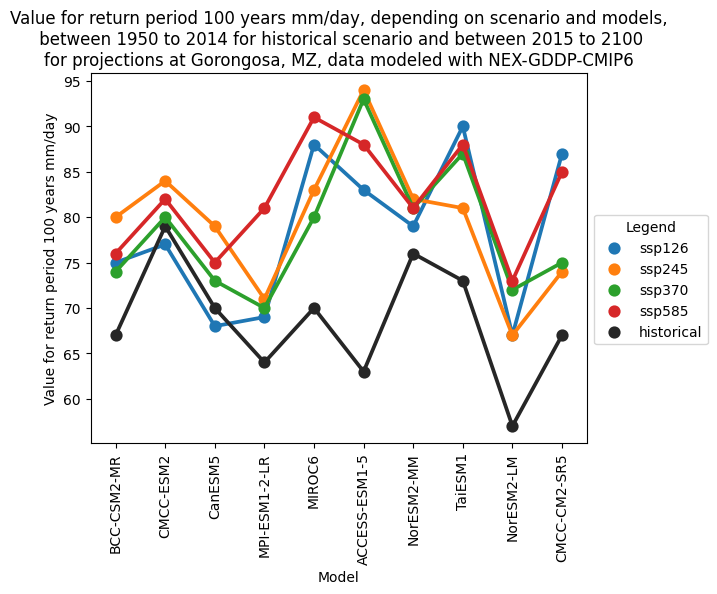

In [278]:
fig,ax=plt.subplots()
sns.pointplot(data=return_period_future_clean[['Experiment','Model','Value for return period 100 years mm/day']],x='Model',y='Value for return period 100 years mm/day',hue='Experiment')

sns.pointplot(data=return_period_past_gorongosa_clean[['Experiment','Model','Value for return period 100 years mm/day']],x='Model',y='Value for return period 100 years mm/day',hue='Experiment',color='black')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
handles, labels=ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=1, bbox_to_anchor=(1.1, 0.6),title='Legend')
ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line

plt.title('Value for return period 100 years mm/day, depending on scenario and models,\n between 1950 to 2014 for historical scenario and between 2015 to 2100\nfor projections at Gorongosa, MZ, data modeled with NEX-GDDP-CMIP6')

In [279]:
return_period_past_gorongosa_clean

,Experiment,Model,Value for return period 50 years mm/day,Value for return period 100 years mm/day
10,historical,BCC-CSM2-MR,63,67
11,historical,CMCC-ESM2,72,79
12,historical,CanESM5,64,70
13,historical,MPI-ESM1-2-LR,60,64
14,historical,MIROC6,65,70
15,historical,ACCESS-ESM1-5,58,63
16,historical,NorESM2-MM,70,76
17,historical,TaiESM1,68,73
18,historical,NorESM2-LM,54,57
19,historical,CMCC-CM2-SR5,63,67


In [280]:
return_period_future_clean

,Experiment,Model,Value for return period 50 years mm/day,Value for return period 100 years mm/day
40,ssp126,BCC-CSM2-MR,69,75
41,ssp126,CMCC-ESM2,70,77
42,ssp126,CanESM5,63,68
43,ssp126,MPI-ESM1-2-LR,64,69
44,ssp126,MIROC6,80,88
45,ssp126,ACCESS-ESM1-5,76,83
46,ssp126,NorESM2-MM,72,79
47,ssp126,TaiESM1,82,90
48,ssp126,NorESM2-LM,62,67
49,ssp126,CMCC-CM2-SR5,80,87


In [281]:
df_boxplot = pd.concat([return_period_past_gorongosa_clean,return_period_future_clean])

In [282]:
df_boxplot

,Experiment,Model,Value for return period 50 years mm/day,Value for return period 100 years mm/day
10,historical,BCC-CSM2-MR,63,67
11,historical,CMCC-ESM2,72,79
12,historical,CanESM5,64,70
13,historical,MPI-ESM1-2-LR,60,64
14,historical,MIROC6,65,70
15,historical,ACCESS-ESM1-5,58,63
16,historical,NorESM2-MM,70,76
17,historical,TaiESM1,68,73
18,historical,NorESM2-LM,54,57
19,historical,CMCC-CM2-SR5,63,67


Text(0.5, 1.0, 'Value for return period 100 years mm/day, depending on scenario and accross models,\n between 1950 to 2014 for historical scenario and between 2015 to 2100\nfor projections at Gorongosa, MZ, data modeled with NEX-GDDP-CMIP6')

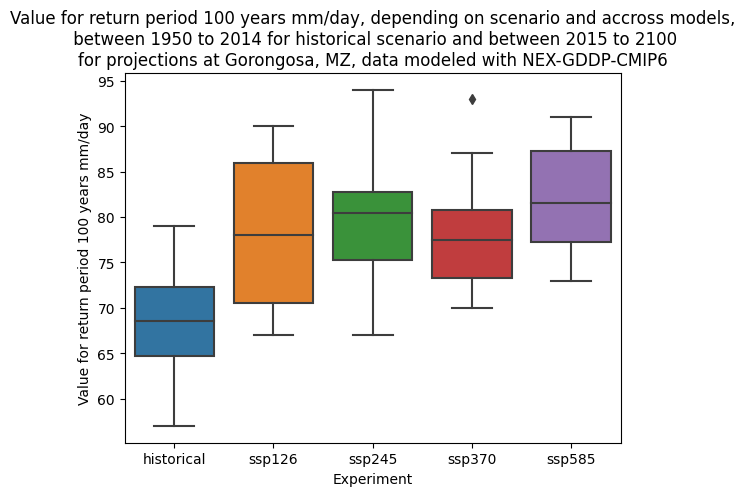

In [283]:
fig,ax=plt.subplots()
sns.boxplot(data=df_boxplot[['Experiment','Model','Value for return period 100 years mm/day']],x='Experiment',y='Value for return period 100 years mm/day')#,hue='Experiment')

#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
#handles, labels=ax.get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper right', ncol=1, bbox_to_anchor=(1.1, 0.6),title='Legend')
#ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line

plt.title('Value for return period 100 years mm/day, depending on scenario and accross models,\n between 1950 to 2014 for historical scenario and between 2015 to 2100\nfor projections at Gorongosa, MZ, data modeled with NEX-GDDP-CMIP6')

In [284]:
df_future = df_years[df_years['Experiment']!='historical']
df_future_2020_2060 = df_future[df_future['Year'].between(2020,2060)]
df_future_2060_2100 = df_future[df_future['Year'].between(2060,2100)]

In [285]:
return_period_future_2020_2060=dataframe_threshold_coresponding_to_return_period(df_future_2020_2060)

Name project Chimoio_WTP_EIB ssp ssp126 model ACCESS-ESM1-5
Name project Chimoio_WTP_EIB ssp ssp126 model BCC-CSM2-MR
Name project Chimoio_WTP_EIB ssp ssp126 model CMCC-CM2-SR5
Name project Chimoio_WTP_EIB ssp ssp126 model CMCC-ESM2
Name project Chimoio_WTP_EIB ssp ssp126 model CanESM5
Name project Chimoio_WTP_EIB ssp ssp126 model MIROC6
Name project Chimoio_WTP_EIB ssp ssp126 model MPI-ESM1-2-LR
Name project Chimoio_WTP_EIB ssp ssp126 model NorESM2-LM
Name project Chimoio_WTP_EIB ssp ssp126 model NorESM2-MM
Name project Chimoio_WTP_EIB ssp ssp126 model TaiESM1
Name project Chimoio_WTP_EIB ssp ssp245 model ACCESS-ESM1-5
Name project Chimoio_WTP_EIB ssp ssp245 model BCC-CSM2-MR
Name project Chimoio_WTP_EIB ssp ssp245 model CMCC-CM2-SR5
Name project Chimoio_WTP_EIB ssp ssp245 model CMCC-ESM2
Name project Chimoio_WTP_EIB ssp ssp245 model CanESM5
Name project Chimoio_WTP_EIB ssp ssp245 model MIROC6
Name project Chimoio_WTP_EIB ssp ssp245 model MPI-ESM1-2-LR
Name project Chimoio_WTP_EIB ssp

C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_6780\2439846336.py:17: PerformanceWarning: indexing past lexsort depth may impact performance.
  return_period.loc[(name_p,ssp,model),('Value for return period 50 years mm/day')] = threshold_coresponding_to_return_period(loc1,scale,50)
C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_6780\2439846336.py:18: PerformanceWarning: indexing past lexsort depth may impact performance.
  return_period.loc[(name_p,ssp,model),('Value for return period 100 years mm/day')] = threshold_coresponding_to_return_period(loc1,scale,100)


Name project Gorongosa_EIB ssp ssp585 model CMCC-CM2-SR5
Name project Gorongosa_EIB ssp ssp585 model CMCC-ESM2
Name project Gorongosa_EIB ssp ssp585 model CanESM5
Name project Gorongosa_EIB ssp ssp585 model MIROC6
Name project Gorongosa_EIB ssp ssp585 model MPI-ESM1-2-LR
Name project Gorongosa_EIB ssp ssp585 model NorESM2-LM
Name project Gorongosa_EIB ssp ssp585 model NorESM2-MM
Name project Gorongosa_EIB ssp ssp585 model TaiESM1
Name project Pemba_EIB ssp ssp126 model ACCESS-ESM1-5
Name project Pemba_EIB ssp ssp126 model BCC-CSM2-MR
Name project Pemba_EIB ssp ssp126 model CMCC-CM2-SR5
Name project Pemba_EIB ssp ssp126 model CMCC-ESM2
Name project Pemba_EIB ssp ssp126 model CanESM5
Name project Pemba_EIB ssp ssp126 model MIROC6
Name project Pemba_EIB ssp ssp126 model MPI-ESM1-2-LR
Name project Pemba_EIB ssp ssp126 model NorESM2-LM
Name project Pemba_EIB ssp ssp126 model NorESM2-MM
Name project Pemba_EIB ssp ssp126 model TaiESM1
Name project Pemba_EIB ssp ssp245 model ACCESS-ESM1-5
Name

In [286]:
return_period_future_2060_2100=dataframe_threshold_coresponding_to_return_period(df_future_2060_2100)

Name project Chimoio_WTP_EIB ssp ssp126 model ACCESS-ESM1-5
Name project Chimoio_WTP_EIB ssp ssp126 model BCC-CSM2-MR
Name project Chimoio_WTP_EIB ssp ssp126 model CMCC-CM2-SR5
Name project Chimoio_WTP_EIB ssp ssp126 model CMCC-ESM2
Name project Chimoio_WTP_EIB ssp ssp126 model CanESM5
Name project Chimoio_WTP_EIB ssp ssp126 model MIROC6
Name project Chimoio_WTP_EIB ssp ssp126 model MPI-ESM1-2-LR
Name project Chimoio_WTP_EIB ssp ssp126 model NorESM2-LM
Name project Chimoio_WTP_EIB ssp ssp126 model NorESM2-MM
Name project Chimoio_WTP_EIB ssp ssp126 model TaiESM1
Name project Chimoio_WTP_EIB ssp ssp245 model ACCESS-ESM1-5
Name project Chimoio_WTP_EIB ssp ssp245 model BCC-CSM2-MR
Name project Chimoio_WTP_EIB ssp ssp245 model CMCC-CM2-SR5
Name project Chimoio_WTP_EIB ssp ssp245 model CMCC-ESM2
Name project Chimoio_WTP_EIB ssp ssp245 model CanESM5
Name project Chimoio_WTP_EIB ssp ssp245 model MIROC6
Name project Chimoio_WTP_EIB ssp ssp245 model MPI-ESM1-2-LR
Name project Chimoio_WTP_EIB ssp

C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_6780\2439846336.py:17: PerformanceWarning: indexing past lexsort depth may impact performance.
  return_period.loc[(name_p,ssp,model),('Value for return period 50 years mm/day')] = threshold_coresponding_to_return_period(loc1,scale,50)
C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_6780\2439846336.py:18: PerformanceWarning: indexing past lexsort depth may impact performance.
  return_period.loc[(name_p,ssp,model),('Value for return period 100 years mm/day')] = threshold_coresponding_to_return_period(loc1,scale,100)


Name project Pemba_EIB ssp ssp370 model ACCESS-ESM1-5
Name project Pemba_EIB ssp ssp370 model BCC-CSM2-MR
Name project Pemba_EIB ssp ssp370 model CMCC-CM2-SR5
Name project Pemba_EIB ssp ssp370 model CMCC-ESM2
Name project Pemba_EIB ssp ssp370 model CanESM5
Name project Pemba_EIB ssp ssp370 model MIROC6
Name project Pemba_EIB ssp ssp370 model MPI-ESM1-2-LR
Name project Pemba_EIB ssp ssp370 model NorESM2-LM
Name project Pemba_EIB ssp ssp370 model NorESM2-MM
Name project Pemba_EIB ssp ssp370 model TaiESM1
Name project Pemba_EIB ssp ssp585 model ACCESS-ESM1-5
Name project Pemba_EIB ssp ssp585 model BCC-CSM2-MR
Name project Pemba_EIB ssp ssp585 model CMCC-CM2-SR5
Name project Pemba_EIB ssp ssp585 model CMCC-ESM2
Name project Pemba_EIB ssp ssp585 model CanESM5
Name project Pemba_EIB ssp ssp585 model MIROC6
Name project Pemba_EIB ssp ssp585 model MPI-ESM1-2-LR
Name project Pemba_EIB ssp ssp585 model NorESM2-LM
Name project Pemba_EIB ssp ssp585 model NorESM2-MM
Name project Pemba_EIB ssp ssp58

In [287]:
return_period_future_2020_2060['Period'] = '2020-2060'

In [288]:
return_period_future_2060_2100['Period'] = '2060-2100'

In [289]:
return_period_future_2020_2060

Value for return period 50 years mm/day  \
Name project    Experiment Model                                                   
Chimoio_WTP_EIB ssp126     BCC-CSM2-MR                                        63   
                           CMCC-ESM2                                          63   
                           CanESM5                                            61   
                           MPI-ESM1-2-LR                                      62   
                           MIROC6                                             81   
...                                                                          ...   
Pemba_EIB       ssp585     ACCESS-ESM1-5                                      71   
                           NorESM2-MM                                         59   
                           TaiESM1                                            60   
                           NorESM2-LM                                         50   
                           CMCC-CM2-SR5                                       66   

                                         Value for return period 100 years mm/day  \
Name project    Experiment Model                                                    
Chimoio_WTP_EIB ssp126     BCC-CSM2-MR                                         69   
                           CMCC-ESM2                                           69   
                           CanESM5                                             67   
                           MPI-ESM1-2-LR                                       67   
                           MIROC6                                              89   
...                                                                           ...   
Pemba_EIB       ssp585     ACCESS-ESM1-5                                       78   
                           NorESM2-MM                                          64   
                           TaiESM1                                             65   
                           NorESM2-LM                                          54   
                           CMCC-CM2-SR5                                        71   

                                             Period  
Name project    Experiment Model                     
Chimoio_WTP_EIB ssp126     BCC-CSM2-MR    2020-2060  
                           CMCC-ESM2      2020-2060  
                           CanESM5        2020-2060  
                           MPI-ESM1-2-LR  2020-2060  
                           MIROC6         2020-2060  
...                                             ...  
Pemba_EIB       ssp585     ACCESS-ESM1-5  2020-2060  
                           NorESM2-MM     2020-2060  
                           TaiESM1        2020-2060  
                           NorESM2-LM     2020-2060  
                           CMCC-CM2-SR5   2020-2060  

[160 rows x 3 columns]

In [290]:
return_period_future_2020_2060 = return_period_future_2020_2060.reset_index()
return_period_future_2020_2060_gorongosa = return_period_future_2020_2060[return_period_future_2020_2060['Name project']=='Gorongosa_EIB']

In [291]:
return_period_future_2020_2060_gorongosa = return_period_future_2020_2060_gorongosa.drop('Name project',axis=1)

In [292]:
return_period_future_2060_2100 = return_period_future_2060_2100.reset_index()
return_period_future_2060_2100_gorongosa = return_period_future_2060_2100[return_period_future_2060_2100['Name project']=='Gorongosa_EIB']
return_period_future_2060_2100_gorongosa = return_period_future_2060_2100_gorongosa.drop('Name project',axis=1)

In [293]:
return_period_past_gorongosa_clean['Period'] = '1950-2014'

In [294]:
df_boxplot = pd.concat([return_period_past_gorongosa_clean,return_period_future_2020_2060_gorongosa,return_period_future_2060_2100_gorongosa])

In [295]:
df_boxplot

,Experiment,Model,Value for return period 50 years mm/day,Value for return period 100 years mm/day,Period
10,historical,BCC-CSM2-MR,63,67,1950-2014
11,historical,CMCC-ESM2,72,79,1950-2014
12,historical,CanESM5,64,70,1950-2014
13,historical,MPI-ESM1-2-LR,60,64,1950-2014
14,historical,MIROC6,65,70,1950-2014
...,...,...,...,...,...
75,ssp585,ACCESS-ESM1-5,88,97,2060-2100
76,ssp585,NorESM2-MM,79,86,2060-2100
77,ssp585,TaiESM1,78,86,2060-2100
78,ssp585,NorESM2-LM,74,81,2060-2100


Text(0.5, 1.0, 'Value for return period 100 years mm/day, depending on period\n and scenario, presented accross models, at Gorongosa, MZ\ndata modeled with NEX-GDDP-CMIP6')

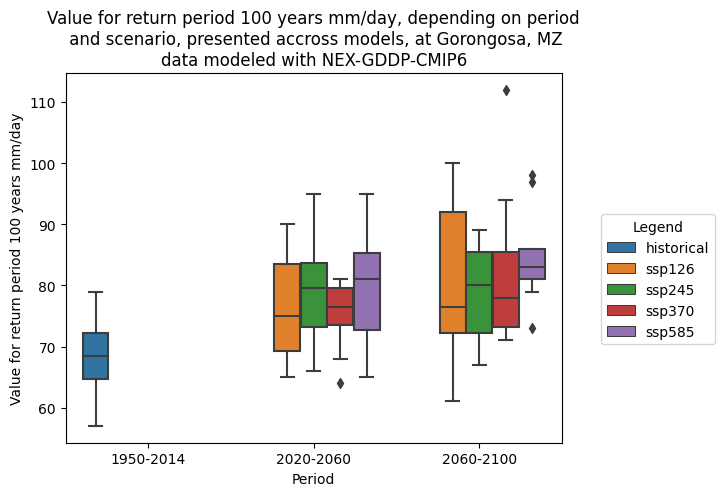

In [296]:
fig,ax=plt.subplots()
sns.boxplot(data=df_boxplot[['Experiment','Model','Value for return period 100 years mm/day','Period']],x='Period',y='Value for return period 100 years mm/day',hue='Experiment')

handles, labels=ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=1, bbox_to_anchor=(1.15, 0.6),title='Legend')
ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line

plt.title('Value for return period 100 years mm/day, depending on period\n and scenario, presented accross models, at Gorongosa, MZ\ndata modeled with NEX-GDDP-CMIP6')

In [298]:
df_years_gorongosa

,Experiment,Model,Date,Mean of the daily precipitation rate mm_per_day,Year,Month,Season
2091390,historical,ACCESS-CM2,01-01-1950,3.830031,1950,Jan,Humid
2091391,historical,ACCESS-CM2,02-01-1950,2.447746,1950,Jan,Humid
2091392,historical,ACCESS-CM2,03-01-1950,1.033146,1950,Jan,Humid
2091393,historical,ACCESS-CM2,04-01-1950,12.821172,1950,Jan,Humid
2091394,historical,ACCESS-CM2,05-01-1950,19.139076,1950,Jan,Humid
...,...,...,...,...,...,...,...
4182775,ssp370,TaiESM1,27-12-2100,23.041087,2100,Dec,Humid
4182776,ssp370,TaiESM1,28-12-2100,16.827069,2100,Dec,Humid
4182777,ssp370,TaiESM1,29-12-2100,11.197097,2100,Dec,Humid
4182778,ssp370,TaiESM1,30-12-2100,20.220607,2100,Dec,Humid


In [305]:
data1=df_years_gorongosa.groupby(['Experiment','Model','Year'])[['Mean of the daily precipitation rate mm_per_day']].agg(np.nanmax).reset_index()

In [306]:
data1

,Experiment,Model,Year,Mean of the daily precipitation rate mm_per_day
0,historical,ACCESS-CM2,1950,54.175285
1,historical,ACCESS-CM2,1951,38.026710
2,historical,ACCESS-CM2,1952,45.858643
3,historical,ACCESS-CM2,1953,44.796196
4,historical,ACCESS-CM2,1954,42.858247
...,...,...,...,...
5721,ssp585,TaiESM1,2096,35.702064
5722,ssp585,TaiESM1,2097,51.304595
5723,ssp585,TaiESM1,2098,46.363644
5724,ssp585,TaiESM1,2099,25.919493


<Axes: xlabel='Year', ylabel='Mean of the daily precipitation rate mm_per_day'>

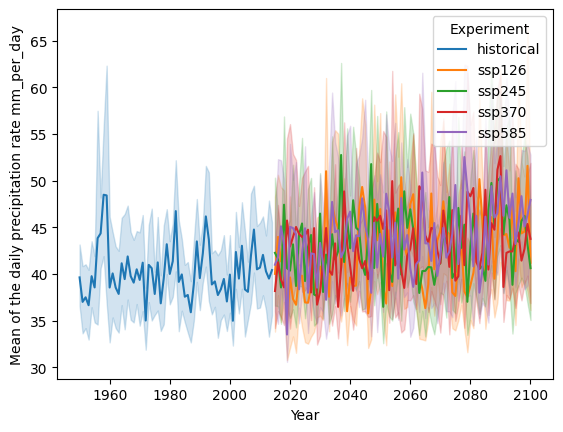

In [307]:
sns.lineplot(data=data1,x='Year',y='Mean of the daily precipitation rate mm_per_day',hue='Experiment')

Text(0.5, 1.0, 'Value for return period 50 years mm/day, depending on scenario and models,\n between 1950 to 2014 for historical scenario and between 2015 to 2100\nfor projections at Gorongosa, MZ, data modeled with NEX-GDDP-CMIP6')

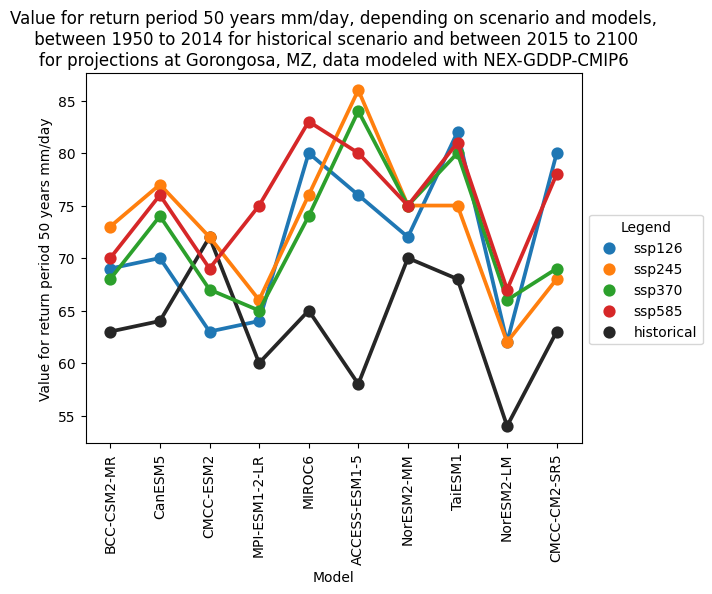

In [170]:
fig,ax=plt.subplots()
sns.pointplot(data=return_period_future_clean[['Experiment','Model','Value for return period 50 years mm/day']],x='Model',y='Value for return period 50 years mm/day',hue='Experiment')

sns.pointplot(data=return_period_past_gorongosa_clean[['Experiment','Model','Value for return period 50 years mm/day']],x='Model',y='Value for return period 50 years mm/day',hue='Experiment',color='black')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
handles, labels=ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=1, bbox_to_anchor=(1.1, 0.6),title='Legend')
ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line

plt.title('Value for return period 50 years mm/day, depending on scenario and models,\n between 1950 to 2014 for historical scenario and between 2015 to 2100\nfor projections at Gorongosa, MZ, data modeled with NEX-GDDP-CMIP6')

In [148]:
return_period_future_clean

,Experiment,Model,Value for return period 50 years mm/day,Value for return period 100 years mm/day
40,ssp126,BCC-CSM2-MR,69,75
41,ssp126,CMCC-ESM2,70,77
42,ssp126,CanESM5,63,68
43,ssp126,MPI-ESM1-2-LR,64,69
44,ssp126,MIROC6,80,88
45,ssp126,ACCESS-ESM1-5,76,83
46,ssp126,NorESM2-MM,72,79
47,ssp126,TaiESM1,82,90
48,ssp126,NorESM2-LM,62,67
49,ssp126,CMCC-CM2-SR5,80,87


In [119]:
def threshold_coresponding_to_return_period(loc,scale,T):
    p_non_exceedance = 1 - (1/T)
    try:
        threshold_coresponding = round(gumbel_r.ppf(p_non_exceedance,loc,scale))
    except OverflowError: # the result is not finite
        if math.isinf(gumbel_r.ppf(p_non_exceedance,loc,scale)) and gumbel_r.ppf(p_non_exceedance,loc,scale)<0:
            # ppf is the inverse of cdf
            # the result is -inf
            threshold_coresponding = 0 # the value of wero is imposed
    return threshold_coresponding
    # ppf: Percent point function
    #print('Threshold '+str(threshold_coresponding)+' mm/day will be exceeded at least once in '+str(n)+' year, with a probability of '+str(round(p_exceedance*100))+ ' %')
    #print('This threshold corresponds to a return period of '+str(round(return_period))+ ' year event over a '+str(n)+' year period')

In [196]:
def dataframe_threshold_coresponding_to_return_period_year(df):
    df_copy=df.copy(deep=True)
    #df_copy=df_copy.drop(labels='Date',axis=1)
    #df_max = df_copy.groupby(['Name project','Experiment','Model','Year']).max() # maximum    
    midx = pd.MultiIndex.from_product([list(set(df_copy[df_copy.columns[0]])),list(set(df_copy[df_copy.columns[1]])),list(set(df_copy[df_copy.columns[2]])),list(set(df_copy[df_copy.columns[5]]))],names=['Name project','Experiment', 'Model','Year'])
    cols = ['Value for return period 50 years mm/day','Value for return period 100 years mm/day']
    return_period = pd.DataFrame(data = [], 
                                index = midx,
                                columns = cols)
    for name_p in return_period.index.levels[0].tolist():
        for ssp in return_period.index.levels[1].tolist():
            for model in return_period.index.levels[2].tolist():
                for year in return_period.index.levels[3].tolist():
                    print('Name project '+name_p+ ' ssp '+ssp+ ' model '+model+' year '+str(year))
                    df_copy2=df_copy[df_copy['Name project']==name_p]
                    df_copy2 = df_copy2[df_copy2['Experiment']==ssp]
                    df_copy2=df_copy2[df_copy2['Model']==model]
                    df_copy2= df_copy2[df_copy2['Year']==year]
                    Z=df_copy2['Mean of the daily precipitation rate mm_per_day'].values.reshape(len(df_copy2['Mean of the daily precipitation rate mm_per_day']),)
                    (loc1,scale)=stats.gumbel_r.fit(Z) # return the function necessary to establish the continous function
                    # choice of gumbel because suits to extreme precipitation
                    return_period.loc[(name_p,ssp,model,year),('Value for return period 50 years mm/day')] = threshold_coresponding_to_return_period(loc1,scale,50)
                    return_period.loc[(name_p,ssp,model,year),('Value for return period 100 years mm/day')] = threshold_coresponding_to_return_period(loc1,scale,100)

    return return_period

In [172]:
df_copy=df_years.copy(deep=True)
df_copy=df_copy.drop(labels='Date',axis=1)
df_max = df_copy.groupby(['Name project','Experiment','Model','Year'])#.max() # maximum   

In [192]:
df_years[df_years['Experiment']=='historical' & df_years['Model']=='ACCESS-ESM1-5' ]

TypeError: Cannot perform 'rand_' with a dtyped [object] array and scalar of type [bool]

In [197]:
df_year_past=dataframe_threshold_coresponding_to_return_period_year(df_years[df_years['Experiment']=='historical'])
df_year_past

Name project Chimoio_WTP_EIB ssp historical model ACCESS-ESM1-5 year 1950
Name project Chimoio_WTP_EIB ssp historical model ACCESS-ESM1-5 year 1951
Name project Chimoio_WTP_EIB ssp historical model ACCESS-ESM1-5 year 1952


C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_6780\1846222534.py:22: PerformanceWarning: indexing past lexsort depth may impact performance.
  return_period.loc[(name_p,ssp,model,year),('Value for return period 50 years mm/day')] = threshold_coresponding_to_return_period(loc1,scale,50)
C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_6780\1846222534.py:23: PerformanceWarning: indexing past lexsort depth may impact performance.
  return_period.loc[(name_p,ssp,model,year),('Value for return period 100 years mm/day')] = threshold_coresponding_to_return_period(loc1,scale,100)


Name project Chimoio_WTP_EIB ssp historical model ACCESS-ESM1-5 year 1953
Name project Chimoio_WTP_EIB ssp historical model ACCESS-ESM1-5 year 1954
Name project Chimoio_WTP_EIB ssp historical model ACCESS-ESM1-5 year 1955
Name project Chimoio_WTP_EIB ssp historical model ACCESS-ESM1-5 year 1956
Name project Chimoio_WTP_EIB ssp historical model ACCESS-ESM1-5 year 1957
Name project Chimoio_WTP_EIB ssp historical model ACCESS-ESM1-5 year 1958
Name project Chimoio_WTP_EIB ssp historical model ACCESS-ESM1-5 year 1959
Name project Chimoio_WTP_EIB ssp historical model ACCESS-ESM1-5 year 1960
Name project Chimoio_WTP_EIB ssp historical model ACCESS-ESM1-5 year 1961
Name project Chimoio_WTP_EIB ssp historical model ACCESS-ESM1-5 year 1962
Name project Chimoio_WTP_EIB ssp historical model ACCESS-ESM1-5 year 1963
Name project Chimoio_WTP_EIB ssp historical model ACCESS-ESM1-5 year 1964
Name project Chimoio_WTP_EIB ssp historical model ACCESS-ESM1-5 year 1965
Name project Chimoio_WTP_EIB ssp histo

ValueError: The data contains non-finite values.

In [209]:
df_years2=df_years[df_years['Model']!='BCC-CSM2-MR']
df_years2=df_years2[df_years2['Model']!='CMCC-CM2-SR5']
df_years2=df_years2[df_years2['Model']!='CMCC-ESM2']
df_years2=df_years2[df_years2['Model']!='CanESM5']

In [212]:
df_years2=df_years[df_years['Year'].between(2020,2080)]

In [213]:
df_years2_past=df_years2[df_years2['Experiment']!='historical']
df_years2_past = df_years2_past[df_years2_past['Name project']=='Gorongosa_EIB']

In [214]:
df_year_future=dataframe_threshold_coresponding_to_return_period_year(df_years2_past)
df_year_future

Name project Gorongosa_EIB ssp ssp126 model ACCESS-ESM1-5 year 2020
Name project Gorongosa_EIB ssp ssp126 model ACCESS-ESM1-5 year 2021
Name project Gorongosa_EIB ssp ssp126 model ACCESS-ESM1-5 year 2022
Name project Gorongosa_EIB ssp ssp126 model ACCESS-ESM1-5 year 2023
Name project Gorongosa_EIB ssp ssp126 model ACCESS-ESM1-5 year 2024
Name project Gorongosa_EIB ssp ssp126 model ACCESS-ESM1-5 year 2025
Name project Gorongosa_EIB ssp ssp126 model ACCESS-ESM1-5 year 2026
Name project Gorongosa_EIB ssp ssp126 model ACCESS-ESM1-5 year 2027
Name project Gorongosa_EIB ssp ssp126 model ACCESS-ESM1-5 year 2028
Name project Gorongosa_EIB ssp ssp126 model ACCESS-ESM1-5 year 2029
Name project Gorongosa_EIB ssp ssp126 model ACCESS-ESM1-5 year 2030
Name project Gorongosa_EIB ssp ssp126 model ACCESS-ESM1-5 year 2031
Name project Gorongosa_EIB ssp ssp126 model ACCESS-ESM1-5 year 2032
Name project Gorongosa_EIB ssp ssp126 model ACCESS-ESM1-5 year 2033
Name project Gorongosa_EIB ssp ssp126 model ACCE

ValueError: The data contains non-finite values.

In [ ]:
fig,ax=plt.subplots()
sns.pointplot(data=return_period_future_clean[['Experiment','Model','Value for return period 50 years mm/day']],x='Model',y='Value for return period 50 years mm/day',hue='Experiment')

sns.pointplot(data=return_period_past_gorongosa_clean[['Experiment','Model','Value for return period 50 years mm/day']],x='Model',y='Value for return period 50 years mm/day',hue='Experiment',color='black')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
handles, labels=ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=1, bbox_to_anchor=(1.1, 0.6),title='Legend')
ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line

plt.title('Value for return period 50 years mm/day, depending on scenario and models,\n between 1950 to 2014 for historical scenario and between 2015 to 2100\nfor projections at Gorongosa, MZ, data modeled with NEX-GDDP-CMIP6')

In [178]:
df_years[df_years['Experiment']=='historical']

,Name project,Experiment,Model,Date,Mean of the daily precipitation rate mm_per_day,Year,Month,Season
23741,WTP_Mutua_EIB,historical,ACCESS-ESM1-5,01-01-1950,0.000000,1950,Jan,Humid
23742,WTP_Mutua_EIB,historical,ACCESS-ESM1-5,02-01-1950,0.000000,1950,Jan,Humid
23743,WTP_Mutua_EIB,historical,ACCESS-ESM1-5,03-01-1950,1.017100,1950,Jan,Humid
23744,WTP_Mutua_EIB,historical,ACCESS-ESM1-5,04-01-1950,0.779398,1950,Jan,Humid
23745,WTP_Mutua_EIB,historical,ACCESS-ESM1-5,05-01-1950,0.349717,1950,Jan,Humid
...,...,...,...,...,...,...,...,...
6606539,Pemba_EIB,historical,TaiESM1,27-12-2014,0.000000,2014,Dec,Humid
6606540,Pemba_EIB,historical,TaiESM1,28-12-2014,0.000000,2014,Dec,Humid
6606541,Pemba_EIB,historical,TaiESM1,29-12-2014,0.000000,2014,Dec,Humid
6606542,Pemba_EIB,historical,TaiESM1,30-12-2014,0.179064,2014,Dec,Humid


In [ ]:
# past

In [ ]:
return_period_past=dataframe_threshold_coresponding_to_return_period(df_past)
return_period_past

In [102]:
df_years[df_years['Experiment']=='historical'].groupby('Year').max().reset_index()

,Year,Name project,Experiment,Model,Date,Mean of the daily precipitation rate mm_per_day,Month,Season
0,1950,WTP_Mutua_EIB,historical,TaiESM1,31-12-1950,79.583656,Sep,Humid
1,1951,WTP_Mutua_EIB,historical,TaiESM1,31-12-1951,60.220987,Sep,Humid
2,1952,WTP_Mutua_EIB,historical,TaiESM1,31-12-1952,79.829797,Sep,Humid
3,1953,WTP_Mutua_EIB,historical,TaiESM1,31-12-1953,110.278913,Sep,Humid
4,1954,WTP_Mutua_EIB,historical,TaiESM1,31-12-1954,58.436743,Sep,Humid
...,...,...,...,...,...,...,...,...
60,2010,WTP_Mutua_EIB,historical,TaiESM1,31-12-2010,61.346901,Sep,Humid
61,2011,WTP_Mutua_EIB,historical,TaiESM1,31-12-2011,66.246387,Sep,Humid
62,2012,WTP_Mutua_EIB,historical,TaiESM1,31-12-2012,59.071813,Sep,Humid
63,2013,WTP_Mutua_EIB,historical,TaiESM1,31-12-2013,92.247910,Sep,Humid


In [99]:
return_period1=dataframe_threshold_coresponding_to_return_period(return_period_past=dataframe_threshold_coresponding_to_return_period(df_years[df_years['Experiment']=='historical']))
return_period1

Name project Chimoio_WTP_EIB ssp historical model ACCESS-CM2


ValueError: cannot reshape array of size 195 into shape (65,)

In [94]:
df_years

,Name project,Experiment,Model,Date,Mean of the daily precipitation rate mm_per_day,Year,Month,Season
0,WTP_Mutua_EIB,historical,ACCESS-CM2,01-01-1950,0.657509,1950,Jan,Humid
1,WTP_Mutua_EIB,historical,ACCESS-CM2,02-01-1950,0.442182,1950,Jan,Humid
2,WTP_Mutua_EIB,historical,ACCESS-CM2,03-01-1950,0.031404,1950,Jan,Humid
3,WTP_Mutua_EIB,historical,ACCESS-CM2,04-01-1950,15.071664,1950,Jan,Humid
4,WTP_Mutua_EIB,historical,ACCESS-CM2,05-01-1950,12.865736,1950,Jan,Humid
...,...,...,...,...,...,...,...,...
8365555,Pemba_EIB,ssp370,TaiESM1,27-12-2100,0.286506,2100,Dec,Humid
8365556,Pemba_EIB,ssp370,TaiESM1,28-12-2100,0.050367,2100,Dec,Humid
8365557,Pemba_EIB,ssp370,TaiESM1,29-12-2100,0.000000,2100,Dec,Humid
8365558,Pemba_EIB,ssp370,TaiESM1,30-12-2100,0.581391,2100,Dec,Humid


In [91]:
# give each time different Z values


# ca va etre bizarre dans avec distribution, parce qu'avant juste valeur de 100, donc oui changement, meme valeur pour median, p10 et p90 pour valeur actuel
df_copy=df_years.copy(deep=True)
df_copy=df_copy.drop(labels='Date',axis=1)
df_copy=df_copy.drop(['Month','Season'],axis=1)
df_max_future = df_copy.groupby(['Name project','Experiment','Model','Year'])[['Mean of the daily precipitation rate mm_per_day']].max() # maximum

midx = pd.MultiIndex.from_product([list(set(df_copy[df_copy.columns[0]])),list(set(df_copy[df_copy.columns[1]])),list(set(df_copy[df_copy.columns[2]]))],names=['Name project','Experiment', 'Model'])
cols = ['Return period years of current 100 year return period']
return_period_future = pd.DataFrame(data = [], 
                            index = midx,
                            columns = cols)
for name_p in return_period_future.index.levels[0].tolist():
    for ssp in return_period_future.index.levels[1].tolist():
        for model in return_period_future.index.levels[2].tolist():
            Z=df_max_future.loc[(name_p,ssp,model)].values.reshape(len(df_max_future.index.levels[3]),)
            (loc1,scale1)=stats.gumbel_r.fit(Z) # return the function necessary to establish the continous function
            #return_period_coresponding = 1/(1-gumbel_r.cdf(return_period_past.loc[(name_p,ssp,model),('Value for return period 100 years mm/day')],loc1,scale))
            return_period_future.loc[(name_p,ssp,model),('Return period years of current 100 year return period')] = 1/(1-stats.gumbel_r.cdf(return_period_past.loc[(name_p,ssp,model),('Value for return period 100 years mm/day')],loc1,scale1)**(stop_year_future-start_year_future+1))
            
            #return_period_future.loc[(name_p,ssp,model),('Return period years of current 100 year return period')] = 1/(1-stats.gumbel_r.cdf(return_period_past.loc[(name_p,ssp,model),('Value for return period 100 years mm/day')],loc1,scale1))
            #p_non_exceedance = stats.gumbel_r.cdf(return_period_past.loc[(name_p,ssp,model),('Value for return period 100 years mm/day')],loc1,scale1)
            #return_period_future.loc[(name_p,ssp,model),('Return period years of current 100 year return period')] = stats.gumbel_r.ppf(p_non_exceedance,loc=loc1,scale=scale1)
            print('former value corresponding to 100 years return period '+str(return_period_past.loc[(name_p,ssp,model),('Value for return period 100 years mm/day')]))
            print('p non exceedance '+str(stats.gumbel_r.cdf(return_period_past.loc[(name_p,ssp,model),('Value for return period 100 years mm/day')],loc1,scale1)))
            print('n = '+str(stop_year_future-start_year_future+1))
            print('New return period '+str(return_period_future.loc[(name_p,ssp,model),('Return period years of current 100 year return period')]))

ValueError: cannot reshape array of size 65 into shape (151,)

In [92]:
df_max_future.index.levels[3]

Index([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       ...
       2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100],
      dtype='int64', name='Year', length=151)

In [93]:
df_max_future.loc[(name_p,ssp,model)]

,Mean of the daily precipitation rate mm_per_day
Year,
1950,65.660462
1951,32.800624
1952,63.245377
1953,38.210952
1954,36.827742
...,...
2010,29.523801
2011,30.170413
2012,37.188442


In [ ]:
return_period_future_distribution = return_period_future.astype(int).groupby(['Name project']).describe(percentiles=[.1, .5, .9])
return_period_future_distribution

In [ ]:
return_period_past_100 = return_period_future.copy(deep=True)
return_period_past_100['Return period years of current 100 year return period']=100
return_period_past_100=return_period_past_100.rename(columns={return_period_past_100.columns[0]:'Current return period of interest years'})
return_period_past_100

In [ ]:
return_period_past_100_distribution = return_period_past_100.astype(int).groupby(['Name project']).describe(percentiles=[.1, .5, .9])
return_period_past_100_distribution

In [ ]:
# Comparaison between past and future period
changes_past_future_indicator1 = changes_in_indicators(return_period_past_100_distribution,return_period_future_distribution,'Future return period of one day with a current return period of 100 years','[years]','Extreme rainfall change')
changes_past_future_indicator=pd.merge(changes_past_future_indicator, changes_past_future_indicator1, left_index=True, right_index=True, how='outer')
changes_past_future_indicator

## N-day event

### 1-day event

In [ ]:
from Functions_Indicators_precipitation import dataframe_1_day_event

In [ ]:
# past
df_1_day_event_past = dataframe_1_day_event(df_past)
df_1_day_event_past

In [ ]:
# past
df_1_day_event_future = dataframe_1_day_event(df_future)
df_1_day_event_future

In [ ]:
df_1_day_event_past_distribution = df_1_day_event_past.astype(int).groupby(['Name project']).describe(percentiles=[.1, .5, .9]) # astype(int) necessary to have stats min, max and percentiles
df_1_day_event_future_distribution = df_1_day_event_future.astype(int).groupby(['Name project']).describe(percentiles=[.1, .5, .9]) # astype(int) necessary to have stats min, max and percentiles

In [ ]:
# Comparaison between past and future period
changes_past_future_indicator1 = changes_in_indicators(df_1_day_event_past_distribution,df_1_day_event_future_distribution,'Maximum one day rainfall','mm','Extreme rainfall change')
changes_past_future_indicator=pd.merge(changes_past_future_indicator, changes_past_future_indicator1, left_index=True, right_index=True, how='outer')
changes_past_future_indicator

### 5-day event

In [ ]:
from Functions_Indicators_precipitation import dataframe_n_day_event
from Functions_Indicators_precipitation import df_to_csv

In [ ]:
# file of 5 day event
title_file = 'pr_5_day_event_'+str(start_year_past)+'-'+str(stop_year_future)+'.csv'
path_for_csv = os.path.join(out_path,'csv_file','pr_5_day_event')
path_to_csv_5_day_event = os.path.join(path_for_csv,title_file)
if not os.path.isfile(path_to_csv_5_day_event):
    print('The file has not been computed')
    df_5_day_event=dataframe_n_day_event(precipitation_2021_2060_copy,5)
    # first parameter is a dataframe, second is the number of days
    path_to_csv_5_day_event = df_to_csv(path_for_csv,title_file)
else:
    print('The file has already been computed')
    df_5_day_event = pd.read_csv(path_to_csv_5_day_event,header=[0],index_col=[0,1,2,3])
df_5_day_event

In [ ]:
df_5_day_event = df_5_day_event.reset_index()

Year = df_5_day_event[['Date']].values.reshape(len(df_5_day_event[['Date']].values),)
for i in np.arange(0,len(df_5_day_event[['Date']].values)):
    Year[i]=int(Year[i][6:10])

df_5_day_event['Year'] = Year
df_5_day_event

In [ ]:
df_5_day_event = df_5_day_event.groupby(['Name project', 'Experiment','Model','Year']).max().drop(labels='Date',axis=1)
df_5_day_event

In [ ]:
df_5_day_event_bis = df_5_day_event.reset_index()
df_5_day_event_past=df_5_day_event_bis.loc[df_5_day_event_bis['Year'].between(start_year_past,stop_year_past)]
df_5_day_event_future=df_5_day_event_bis.loc[df_5_day_event_bis['Year'].between(start_year_future,stop_year_future)]

In [ ]:
df_5_day_event_bis

In [ ]:
df_5_day_event_past

In [ ]:
df_5_day_event_future

In [ ]:
NaN_values= df_5_day_event_past.loc[df_5_day_event_past['Maximum 5 days rainfall mm'].isnull()]
model_to_delete=list(set(NaN_values['Model'].values))

In [ ]:
df_5_day_event_past.Model

In [ ]:
# delete Nan Model
df_5_day_event_past = df_5_day_event_past[df_5_day_event_past.Model.isin(model_to_delete) == False]
df_5_day_event_past

In [ ]:
df_5_day_event_past = df_5_day_event_past.groupby(['Name project', 'Experiment','Model','Year']).max()#.drop(labels=['level_0','index'],axis=1)
df_5_day_event_future = df_5_day_event_future.groupby(['Name project', 'Experiment','Model','Year']).max()#.drop(labels=['level_0','index'],axis=1)

In [ ]:
df_5_day_event_future

In [ ]:
df_5_day_event_past_distribution = df_5_day_event_past.astype(int).groupby(['Name project']).describe(percentiles=[.1, .5, .9]) # astype(int) necessary to have stats min, max and percentiles
df_5_day_event_future_distribution = df_5_day_event_future.astype(int).groupby(['Name project']).describe(percentiles=[.1, .5, .9]) # astype(int) necessary to have stats min, max and percentiles
df_5_day_event_future_distribution

In [ ]:
# Comparaison between past and future period
changes_past_future_indicator1 = changes_in_indicators(df_5_day_event_past_distribution,df_5_day_event_future_distribution,'Maximum 5 days rainfall','mm','Extreme rainfall change')
changes_past_future_indicator=pd.merge(changes_past_future_indicator, changes_past_future_indicator1, left_index=True, right_index=True, how='outer')
changes_past_future_indicator

In [ ]:
changes_past_future_indicator['Extreme rainfall change']

# Exposure level

In [ ]:
from Functions_Indicators_precipitation import level_exposure
# Are project vulnerable ? Exposure level
#from Functions_Indicators_precipitation import level_exposure
Exposure=level_exposure(changes_past_future_indicator)
Exposure